In [152]:
import numpy as np
import arviz as az
import seaborn as sb
import pandas as pd
import json
import matplotlib.pyplot as plt
import glob

In [153]:
def read_json_file_to_trace(filename):
    samples = []
    with open(filename, 'r') as file:
        while True:
            l = file.readline()
            if l == '':
                break
            j = json.loads(l)
            samples.append(j['parameters'])
    for_trace = {k: np.zeros(len(samples)) for k in samples[0].keys()}
    for i, s in enumerate(samples):
        for (k, v) in s.items():
            for_trace[k][i] = v
    return az.convert_to_inference_data(for_trace)

In [154]:
def read_json_file(filename):
    samples = []
    with open(filename, 'r') as file:
        while True:
            l = file.readline()
            if l == '':
                break
            j = json.loads(l)
            j['parameters'] = [j['parameters']]
            samples.append(j)
    key_columns = list(samples[0].keys())
    key_columns.remove('parameters')
    return pd.json_normalize(samples, record_path='parameters', meta=key_columns)

In [280]:
files3991 = glob.glob("jsonlogs/*22293991_*.json")
cyclerichment_alliso = glob.glob("jsonlogs/sampling_log_cyclerichmentalliso_samples_local_0_0.json")
cycletimeseparation = glob.glob("jsonlogs/sampling_log_cycletimeseparation0_samples_local_0_0.json")
cyclerichment_conventional = glob.glob("jsonlogs/sampling_log_cyclerichment_234_236_samples_local_0_0.json")

usedfiles = cyclerichment_conventional
print(usedfiles)

df = pd.concat([read_json_file(f) for f in usedfiles])

['jsonlogs/sampling_log_cyclerichment_234_236_samples_local_0_0.json']


In [281]:
cleaned = df.drop(columns=['concentrations'])

In [282]:
cleaned

cycle_time  high_enrichment_grade  likelihood
0      70.000000              50.000000 -316.848081
1      70.000000              50.000000 -316.848081
2      70.000000              42.228961 -369.320268
3      70.000000              70.795272  -203.30931
4      70.000000              84.271737 -146.153679
...          ...                    ...         ...
7088   54.975526              72.998185  -22.364916
7089   59.333651              72.998185   -2.379327
7090   59.333651              72.998185   -2.379327
7091   59.333651              46.170688  -26.803457
7092   59.333651              94.998504           0

[7093 rows x 3 columns]

In [283]:
cleaned.loc[:, "likelihood"] = cleaned.loc[:, "likelihood"].apply(pd.to_numeric)

In [284]:
cleaned = cleaned[(cleaned['likelihood'] > -100)]
cleaned

cycle_time  high_enrichment_grade  likelihood
10     70.000000              94.969818    0.000000
11     70.000000              94.965404    0.000000
14     54.752333              51.815144   -4.240701
20     47.546023               7.262847   -4.421484
21     47.546023               5.000630   -1.382722
...          ...                    ...         ...
7088   54.975526              72.998185  -22.364916
7089   59.333651              72.998185   -2.379327
7090   59.333651              72.998185   -2.379327
7091   59.333651              46.170688  -26.803457
7092   59.333651              94.998504    0.000000

[6446 rows x 3 columns]

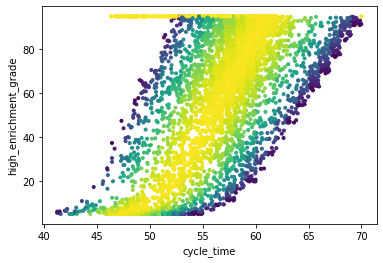

In [286]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(cleaned['cycle_time'].to_numpy(), cleaned['high_enrichment_grade'].to_numpy(), c=cleaned['likelihood'].to_numpy(), marker='.')
ax.set_xlabel('cycle_time')
ax.set_ylabel('high_enrichment_grade')
fig.savefig('cyclerichment_234_236_samples.png')

KeyError: 'separation_factor_fissile'

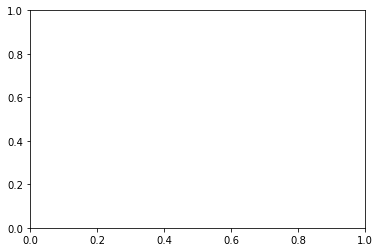

In [254]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(cleaned['cycle_time'].to_numpy(), cleaned['separation_factor_fissile'].to_numpy(), c=cleaned['likelihood'].to_numpy(), marker='.')

KeyError: 'separation_factor_fissile'

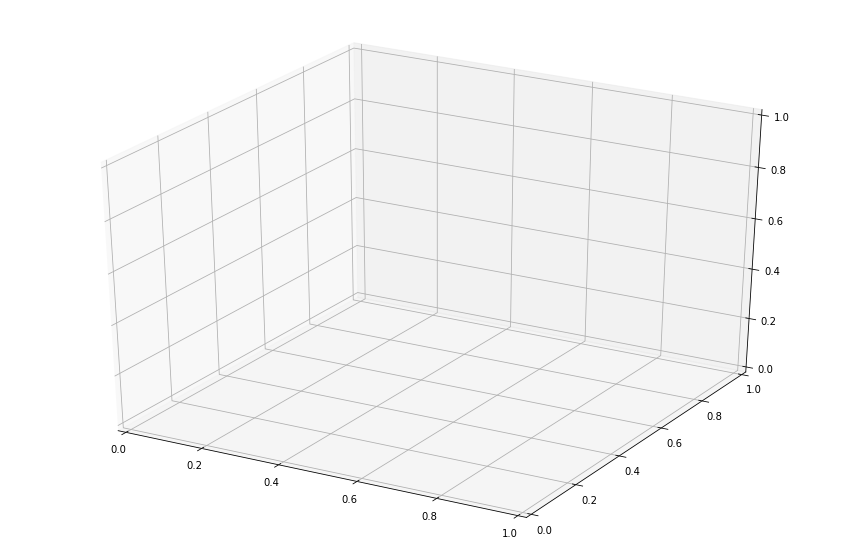

In [216]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
im = ax.scatter(cleaned['cycle_time'].to_numpy(), cleaned['high_enrichment_grade'].to_numpy(), cleaned['separation_factor_fissile'].to_numpy(), c=cleaned['likelihood'].to_numpy(), marker='.')
fig.colorbar(im)
fig.savefig("samplingspace.png")

In [162]:
cleaned.memory_usage()

Index                        381728
cycle_time                   381728
high_enrichment_grade        381728
separation_factor_fissile    381728
likelihood                   381728
dtype: int64